# The Workflow

# Goal:

The primary goal in working with this dataset is to classify which clients are most likely to subscribe to a term deposit. On bigger scale, it allows the bank to target its marketing efforts more effectively, optimizing resource allocation and potentially increasing the success rate of its campaigns. Therefore, the goal of this project is to predict whether a client will subscribe to a term deposit, which is reflected in a binary target variable initially labeled as 'y'. After data cleaning and preparation, this variable is renamed 'response'. The objective is to use various features from the dataset to classify each client as either 'yes', indicating they will subscribe to a term deposit, or 'no', indicating they will not. This classification will help the bank identify potential subscribers more effectively.


# Data Processing:

During the initial phase of data cleaning, a thorough examination revealed no missing values across the dataset. The original dataset comprised 17 columns; however, certain columns such as "contact", "pdays", and "day" were found to be either empty or not providing any meaningful information, and were therefore removed. Additionally, the "marital status" column was also omitted as it was largely vacant and deemed irrelevant to the project's goals.

The "duration" column, which records the time spent on calls with clients in seconds, was converted into minutes to simplify interpretation and analysis. The name of the target variable was updated to "response" to more accurately reflect its role in the analysis.

After these adjustments, the dataset was streamlined to contain only 11 columns. The "month" variable, which initially listed month names, was transformed into an integer representation to facilitate numerical analysis. Furthermore, one-hot encoding was applied to most categorical variables, preparing them for the subsequent exploratory data analysis (EDA) stage.


# Exploratory data analysis (EDA):

For the initial exploratory data analysis (EDA), several techniques were employed to gain insights into the dataset's characteristics and underlying patterns. These included the use of correlation matrices, scatter matrices, individual scatter plots, and histograms to visualize distributions and relationships between variables. To address skewness in the data, logarithmic transformations were applied to some histograms, standardizing their scale and enhancing interpretability.

Additionally, bar plots were utilized to examine the effects of specific variables such as age, education, and job status. These visualizations were particularly important for identifying any prevailing trends that could influence model outcomes. Despite the potential ethical concerns surrounding the inclusion of these variables in machine learning models — due to issues such as bias and discrimination — their impact was analyzed to understand their relevance and influence within the dataset comprehensively and the context. This thorough EDA approach helps in making informed decisions about feature selection and model development while considering both ethical implications and data-driven insights.




# Machine learning algorithms:

Before delving into the specifics of each model, it's important to note that the dataset was initially imbalanced with a disproportionate number of "no" responses (38,289) compared to "yes" responses (4,982), indicating customers' decisions against and for subscribing to a term deposit, respectively. To address this, the Synthetic Minority Over-sampling Technique (SMOTE) was employed to balance the classes, ensuring a fair representation and preventing the models from being biased towards the majority class.


For each of the model below I build them 2 times, once with variables such as "age", "education", and "job" type and then without these to understand how such variables are either important in this cause or not since they introduce ethical considerations.  So total models are:

  1.   **KNN model:** The first model chosen is the K-Nearest Neighbors (KNN). This algorithm was selected for its effectiveness in classification tasks by calculating the 'distance' between points in feature space and predicting the class of a data point based on the majority vote of its nearest neighbors. KNN is a straightforward algorithm that classifies a new data point based on the majority label of its nearest neighbors. This makes it highly intuitive and easy to implement, especially for binary classification. As a non-parametric method, KNN makes no assumptions about the underlying data distribution. This flexibility allows it to adapt easily to real-world data where such assumptions might not hold.

  2.   **Decision Tree:** The second model,  Decision trees can capture complex non-linear relationships between features and the target variable by dividing the space into nested segments. This makes them highly effective for classification where relationships between variables are not straightforward. One of the biggest advantages of decision trees is their interpretability. They can be visualized easily, allowing users to understand how decisions are being made, which is crucial for trust and transparency in applications like banking. Here , Decision trees provide insights into which features are most influential in predicting the target variable, hel

  3.   **Logistic Regression:** Lastly, Logistic regression estimates probabilities using a logistic function, which is particularly useful for binary classification. It provides not just class predictions but also the likelihood of belonging to a class, offering more detailed information for decision-making. Logistic regression is computationally less intensive compared to more complex models, making it suitable for larger datasets and scalable applications.

**Note:** Each of these models is constructed twice—once including ethically sensitive variables such as "age," "education," and "job type," and once excluding them. This dual approach is adopted to critically assess the impact of these variables on the model's predictions and to explore potential ethical considerations their inclusion may raise, such as bias and discrimination. This comprehensive analysis allows us to not only evaluate the technical efficiency of the models but also their fairness and appropriateness in practical applications.



# Optimizing the models:

To optimize the models effectively in the study of the Portuguese Bank Marketing dataset, several robust techniques will be employed, focusing on improving model performance and ensuring generalizability.

**Cross-Validation:**

Cross-validation will be a cornerstone of the model optimization process. Specifically, k-fold cross-validation will be used where the dataset is split into 'k' smaller sets or folds. This method allows for a thorough evaluation of how well each model performs across different subsets of the data, reducing the likelihood of overfitting and ensuring that the model's performance is not dependent on the way the data is split. This technique is particularly valuable given the dataset's initial imbalance and the subsequent application of SMOTE for balancing, as it will help validate that the models remain effective across varied data distributions.

**Hyperparameter Tuning:**

Optimization of each model will also involve extensive hyperparameter tuning:

1. For KNN: The number of neighbors (K) and the distance metric (Euclidean vs. Manhattan) will be adjusted. Tools like GridSearchCV or RandomizedSearchCV will be used to explore different combinations of these parameters to find the optimal setup that minimizes error.

2. For Decision Trees: Parameters such as the maximum depth of the tree and the maximum number of features used at each split will be tuned. This tuning helps in controlling the complexity of the model, making it simple enough to avoid overfitting but complex enough to capture key patterns in the data.

3. For Logistic Regression: The regularization strength (C) and the choice of solver will be optimized. Regularization helps prevent overfitting by penalizing larger coefficients, and the choice of solver can affect the speed and accuracy of the convergence in training the model.




# Analyzing the accuracy of the models:

Given the imbalanced nature of the dataset in the Bank Marketing project, where the number of "no" responses significantly outweighs the number of "yes" responses, relying solely on accuracy as a performance metric can be misleading. Accuracy simply measures the proportion of total correct predictions (both true positives and true negatives), which in cases of imbalanced datasets could result predominantly from the majority class predictions. This can give a false impression of a highly effective model when, in fact, it may just be predicting the majority class well. Therefore, I decided to focus on the *Receiver Operating Characteristic Area Under the Curve (ROC-AUC)* as the primary metric for evaluating model performance. ROC-AUC evaluates the model's ability to discriminate between classes without being influenced by the threshold used to classify observations as positive or negative. This is particularly useful in imbalanced datasets where setting a threshold can be challenging. t provides a comprehensive measure of model performance at all classification thresholds, which is critical when the cost of false negatives differs significantly from the cost of false positives. Additionally, other metrics such as the confusion matrix, F1-score, recall, and precision will be utilized. Furthermore, utilizing the Decision Tree model will provide insights into feature importance, revealing which variables most significantly influence the decision to subscribe. This information is crucial for understanding the driving factors behind customer behavior and can inform targeted marketing strategies.

For this project, a "good" ROC-AUC rate would be close to 1.0, indicating excellent model performance. However, realistically, any ROC-AUC value above 0.6  can be considered satisfactory, particularly in an imbalanced dataset scenario


In [ ]:
# Bank Marketing Data Set. https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

#Goal Binary (yes/no) indicating whether the client subscribed to a term deposit.


In [ ]:
#dataset loading and first 5 enteries

Bank_data = pd.read_csv("https://raw.githubusercontent.com/yfsui/Bank-Telemarketing-ML-Project/master/bank_raw.csv", sep = ';')
Bank_data.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Step 1: Delete the rows which colume 'poutcome' contains 'other'.
condition = Bank_data.poutcome == 'other'
Bank_data = Bank_data.drop(Bank_data[condition].index, axis = 0, inplace = False)



There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [ ]:
# Step 2: Fill 'unknown' in job and education to 'other'
Bank_data[['job','education']] = Bank_data[['job','education']].replace(['unknown'],'other')

In [ ]:
#Step 3:  Drop column "contact" which is useless and has no info
#Drop "Day" because its just the date a specfic client was contacted.
#Drop  "pdays" pdays: number of days that passed by after the client was last contacted from a previous campaign
# Also dropping marital status, marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#Drop "previous:: number of contacts performed before this campaign and for this client (numeric) --> droping this because campsign column is already capturing
#..campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Bank_data = Bank_data.drop('contact', axis=1)
Bank_data = Bank_data.drop('day', axis=1)
Bank_data = Bank_data.drop('pdays', axis=1)
Bank_data.drop(['marital'],axis=1, inplace=True)
Bank_data = Bank_data.drop('previous', axis =1)
Bank_data = Bank_data.drop('poutcome', axis =1)

In [ ]:
# Step 4: The sumamry stat of cleaned dataset
Bank_data.describe()

age        balance      duration      campaign
count  43371.000000   43371.000000  43371.000000  43371.000000
mean      40.986443    1356.963063    258.266930      2.776671
std       10.595454    3030.956348    257.950498      3.138053
min       18.000000   -8019.000000      0.000000      1.000000
25%       33.000000      70.000000    103.000000      1.000000
50%       39.000000     443.000000    180.000000      2.000000
75%       48.000000    1417.000000    318.000000      3.000000
max       95.000000  102127.000000   4918.000000     63.000000

In [ ]:
#Step 5: One hot encoding: Change column name: 'y' to 'Response' of 1s and 0s and check if y is unbalanced
Bank_data.rename(index=str, columns={'y': 'Response'}, inplace = True)

def find_outcome(Bank_data, new_column, old_column):
    Bank_data[new_column] = Bank_data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return Bank_data[new_column].value_counts()

find_outcome(Bank_data, "Responses_binary", "Response")

Responses_binary
0    38389
1     4982
Name: count, dtype: int64

In [ ]:
!pip install imbalanced-learn


In [ ]:


#Step 6: Changing duartion from secinds to minutes /Change the unit of 'duration' from seconds to minutes
Bank_data['duration'] = Bank_data['duration'].apply(lambda n:n/60).round(2)

In [ ]:
#Step 7: Change 'month' from words to numbers for easier analysis
lst = [Bank_data]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12



In [ ]:
Bank_data.head()

age           job  education default  balance housing loan month  duration  \
0   58    management   tertiary      no     2143     yes   no   may       261   
1   44    technician  secondary      no       29     yes   no   may       151   
2   33  entrepreneur  secondary      no        2     yes  yes   may        76   
3   47   blue-collar      other      no     1506     yes   no   may        92   
4   33         other      other      no        1      no   no   may       198   

   campaign   y  
0         1  no  
1         1  no  
2         1  no  
3         1  no  
4         1  no




---


**EDA:**

---



**Scatter matrix and Correlation matrix**

Scatter matrix: For quantitive variables,

Correlation matrix: For qualitative varaibles.

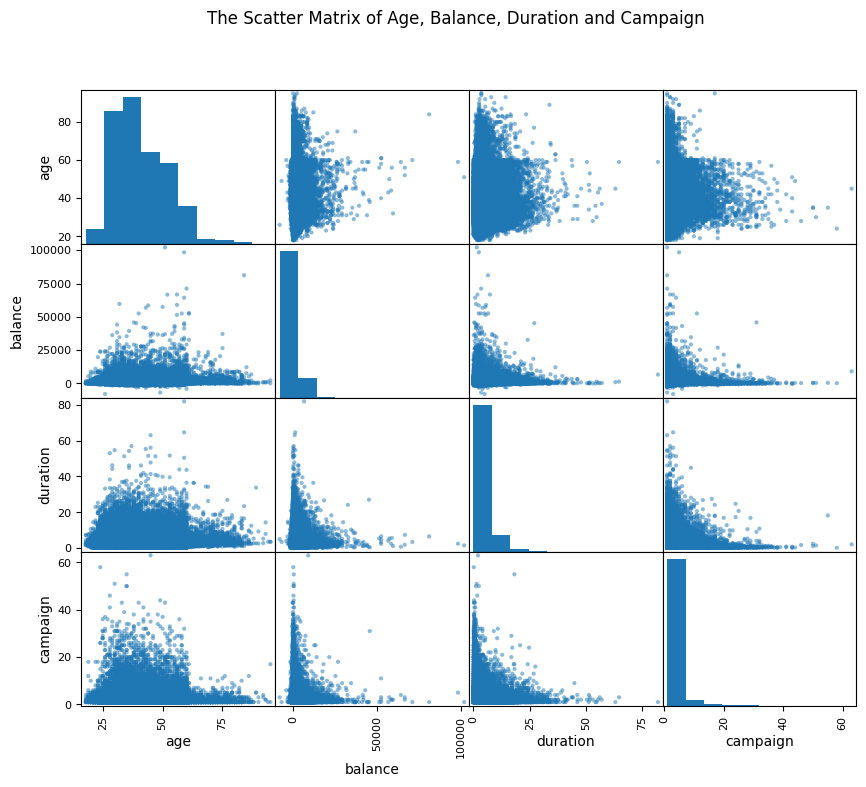

In [ ]:
#Scatter matrix:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(Bank_data[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

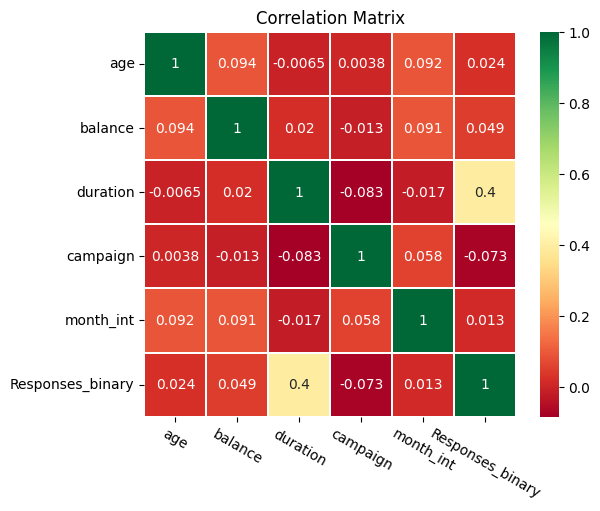

In [ ]:
#Correlation matrix:

corr_data = Bank_data[['age','balance','duration','campaign','month_int','Responses_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

There is no high correlation between any of the variables from correlation and scatter matrix.

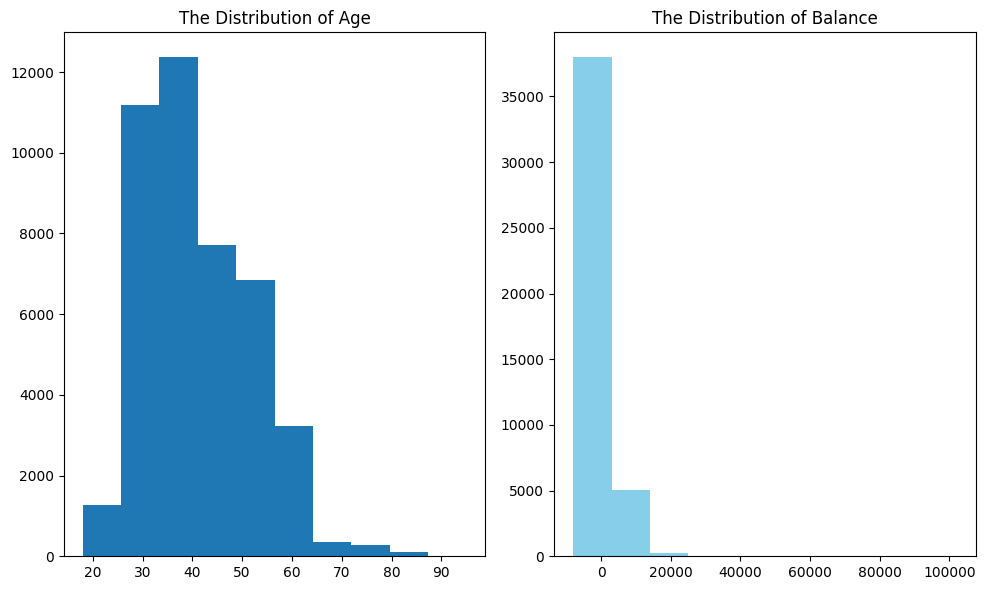

In [ ]:
#Visualize the distribution of 'age' and 'balance'
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(Bank_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(Bank_data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

In order to capture the general trend in the dataset, outliers in the column “balance” are dropped. Outliers are defined as the values which are more than three standard deviations away from the mean.

In [ ]:
from scipy.stats import zscore

Bank_data[['balance']].mean()
Bank_data[['balance']].mean()

Bank_data['balance_outliers'] = Bank_data['balance']
Bank_data['balance_outliers']= zscore(Bank_data['balance_outliers'])

condition1 = (Bank_data['balance_outliers']>3) | (Bank_data['balance_outliers']<-3 )
Bank_data = Bank_data.drop(Bank_data[condition1].index, axis = 0, inplace = False)

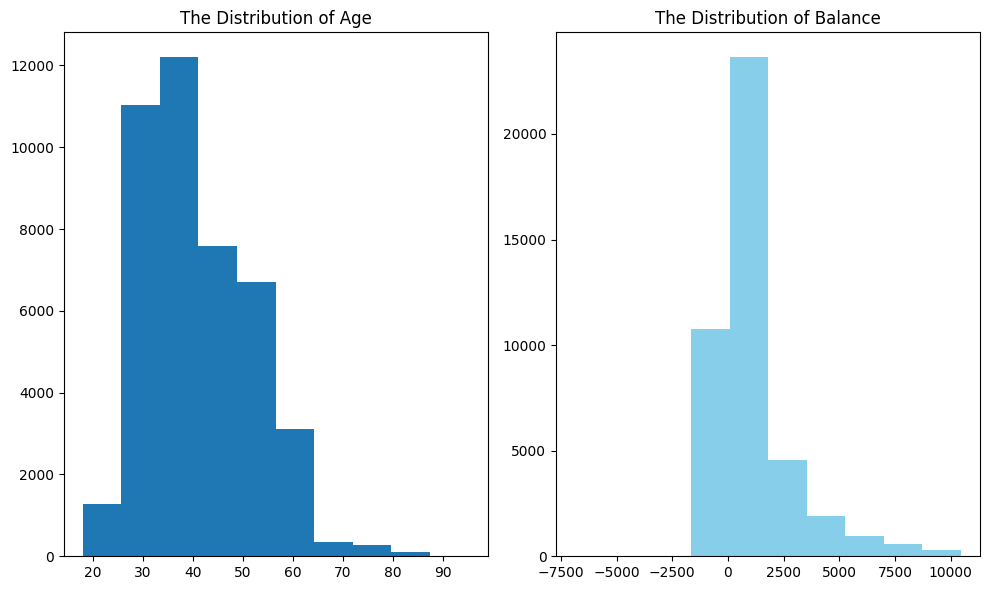

In [ ]:

#Now visualiziing again the plots
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(Bank_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(Bank_data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

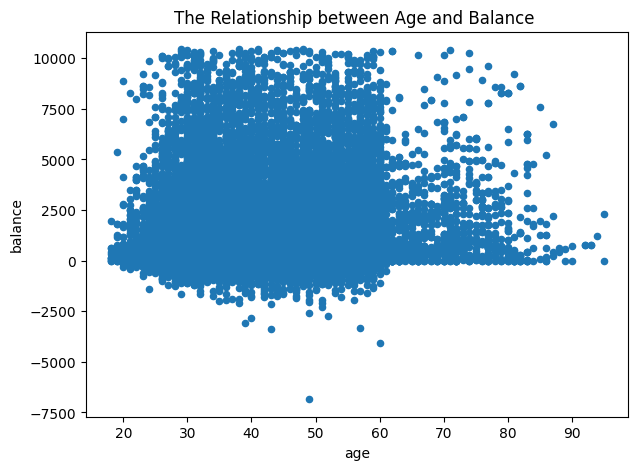

In [ ]:
#Visualize the relationship between 'age' and 'balance'
scatter_age_balance = Bank_data.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level.

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

To see if there is a formation of two relatively separate clusters using duration and campaign

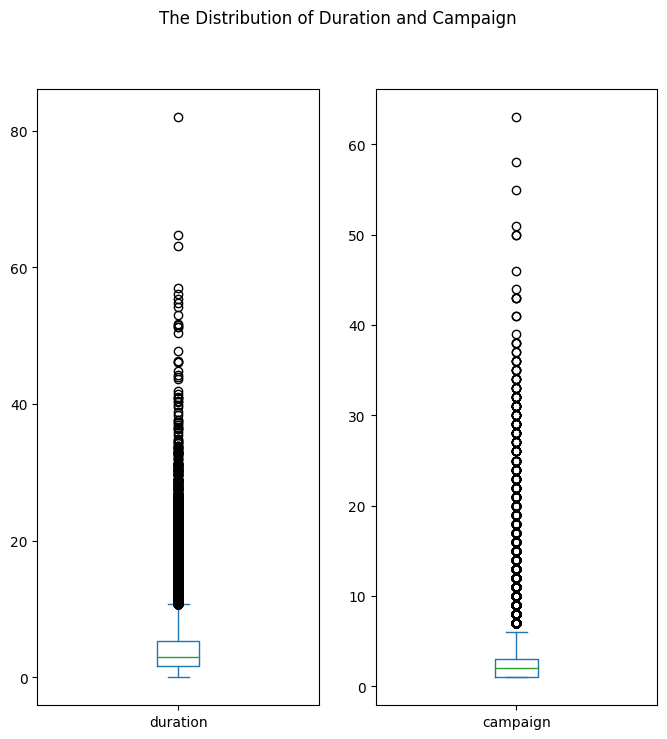

In [ ]:
#Visualize the distribution of 'duration' & 'campaign'
dist_dur_cam = Bank_data[['duration','campaign']].plot(kind = 'box',
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

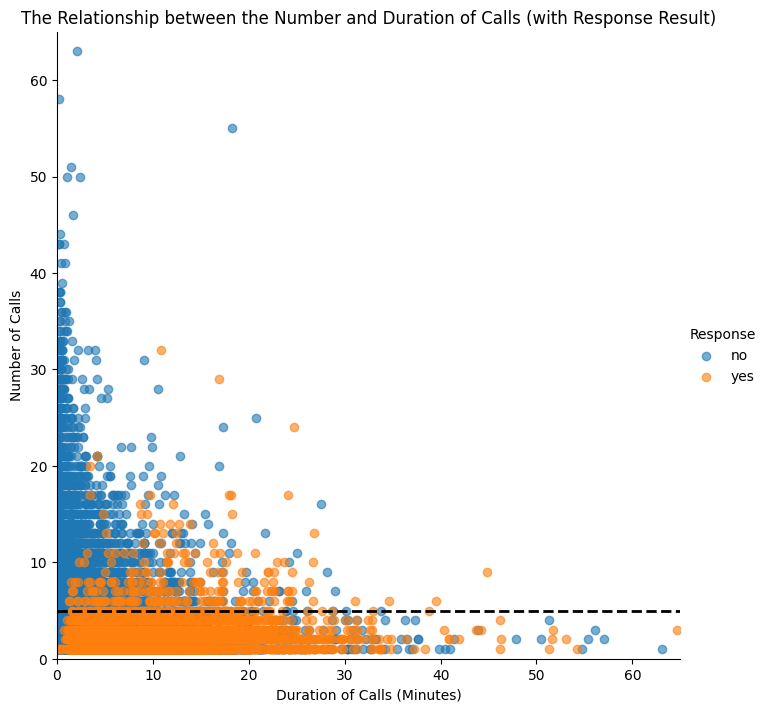

In [ ]:
#Visualize the relationship between 'duration' & 'campaign': with response result
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = Bank_data,
                     hue = 'Response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')

plt.show()


It is  clear “yes” clients and “no” clients are forming two relatively separate clusters on basis of number of calls and duration of calls.

In [ ]:
#Visualize the subscription rate by age

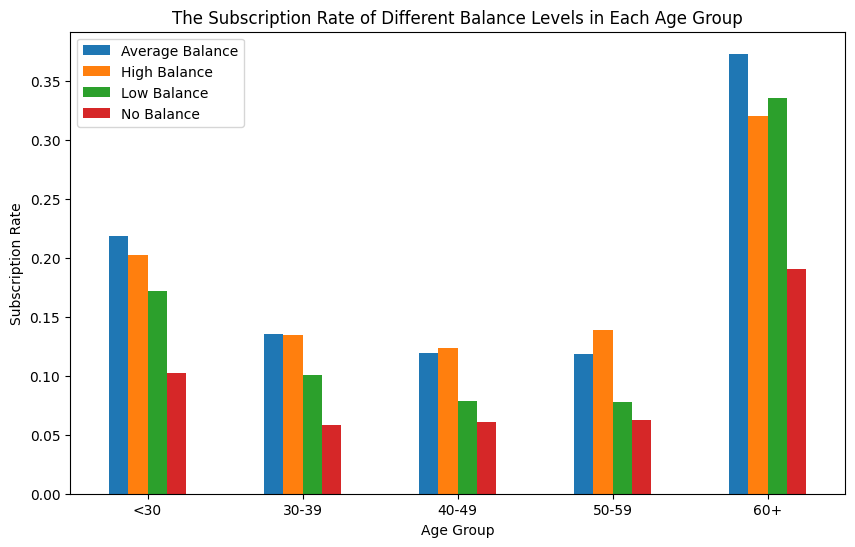

In [ ]:
#Visualize the subscription rate by age and balance

#age group:
lst = [Bank_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60


#balance group
lst = [Bank_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

    #plot

age_balance1 = pd.DataFrame(Bank_data.groupby(['age_group','balance_group'])['Responses_binary'].sum())
age_balance2 = pd.DataFrame(Bank_data.groupby(['age_group','balance_group'])['Response'].count())

age_balance1['Response'] = age_balance2['Response']
age_balance1['Response_rate'] = age_balance1['Responses_binary']/ (age_balance1['Response'])
age_balance1 = age_balance1.drop(['Responses_binary','Response'],axis =1)

age_balance1 = age_balance1.unstack()


age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group. The graph tells that the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.

Furthermore, the effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.

In sum, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.


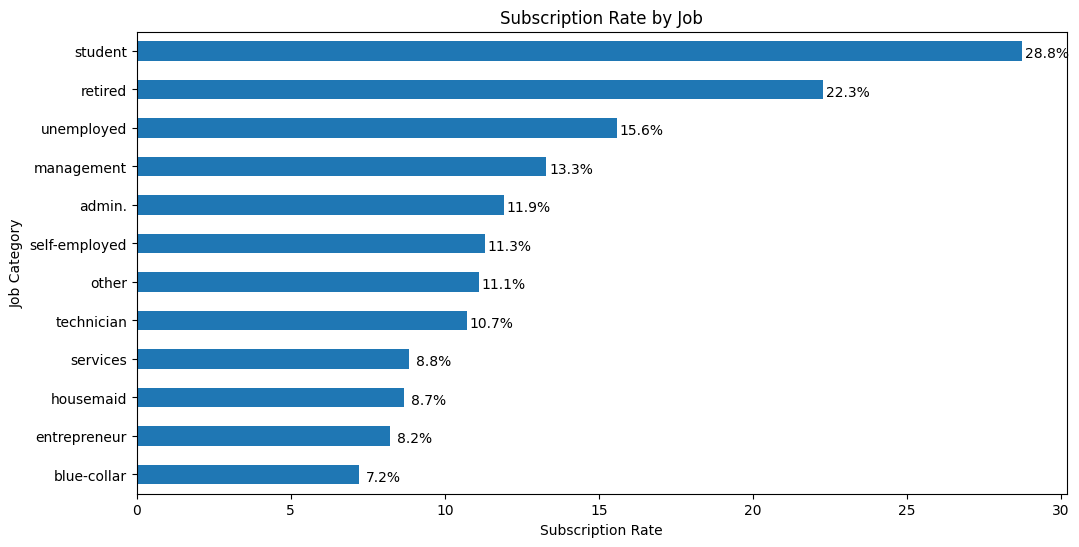

In [ ]:
#Visualize the subscription rate by job
count_job_response_pct = pd.crosstab(Bank_data['Response'],Bank_data['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

 The horizontal bar chart shows that students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.




---


---

Models with All Variables

---



---



The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed.

In [ ]:
find_outcome(Bank_data, "Responses_binary", "Response")

Responses_binary
0    38389
1     4982
Name: count, dtype: int64

>> Above response binary represents the count of binray outcome and it could be seen that the dataset is extremely imbalanced so I will be using oversampling using SMOTE on training data to balance it and then diviiding the dataset as 80% for training amnd 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer

In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming Bank_data is your original DataFrame and it contains the 'month' and 'response' columns
# Convert 'month' from words to numbers
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
Bank_data['month_int'] = Bank_data['month'].apply(lambda x: months.index(x) + 1)

# Drop the original 'month' column if it is no longer needed
Bank_data.drop('month', axis=1, inplace=True)

# Assuming 'Response' is the correct target variable and needs to be binary encoded
Bank_data['Response_binary'] = Bank_data['Response'].apply(lambda x: 1 if x == 'yes' else 0)
Bank_data.drop('Response', axis=1, inplace=True)  # Removing the original 'Response'

# Now explicitly remove 'Responses_binary' if it's different and should not be part of the features
Bank_data.drop('Responses_binary', axis=1, inplace=True)  # Removing if this was mistakenly included

# Create dummy variables for other categorical features if needed
Bank_data_encoded = pd.get_dummies(Bank_data.drop('Response_binary', axis=1))

# Separate features and target variable
X = Bank_data_encoded
y = Bank_data['Response_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution and output the first few rows of X to ensure everything is as expected
print(pd.Series(y_train_resampled).value_counts())
X.head()




Response_binary
0    30733
1    30733
Name: count, dtype: int64


age  balance  day  duration  campaign  pdays  previous  month_int  \
0   58     2143    5      4.35         1     -1         0          5   
1   44       29    5      2.52         1     -1         0          5   
2   33        2    5      1.27         1     -1         0          5   
3   47     1506    5      1.53         1     -1         0          5   
4   33        1    5      3.30         1     -1         0          5   

   job_admin.  job_blue-collar  ...  housing_no  housing_yes  loan_no  \
0       False            False  ...       False         True     True   
1       False            False  ...       False         True     True   
2       False            False  ...       False         True    False   
3       False             True  ...       False         True     True   
4       False            False  ...        True        False     True   

   loan_yes  contact_cellular  contact_telephone  contact_unknown  \
0     False             False              False             True   
1     False             False              False             True   
2      True             False              False             True   
3     False             False              False             True   
4     False             False              False             True   

   poutcome_failure  poutcome_success  poutcome_unknown  
0             False             False              True  
1             False             False              True  
2             False             False              True  
3             False             False              True  
4             False             False              True  

[5 rows x 39 columns]

In [ ]:
#KNN --- HyperPara K values from 1-100 then 30 and Distances (Manhattan and Eucladian)

---
**KNN**


---





In [ ]:
#Step1:  Define the Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline that includes scaling and the KNN classifier
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsClassifier())  # KNN classifier
])


In [ ]:
#Step 2: Define the Parameter Grid

param_grid_knn = {
    'knn__n_neighbors': range(1, 30),
    'knn__metric': ['euclidean', 'manhattan']
}


In [ ]:
#Step 3: Grid Search with Cross-Validation

from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to optimize the KNN parameters
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=10, scoring='roc_auc', verbose=1)
grid_knn.fit(X_train_resampled, y_train_resampled)

# Print best parameters and the corresponding score
print("Best parameters:", grid_knn.best_params_)
print("Best ROC AUC from CV:", grid_knn.best_score_)


Fitting 10 folds for each of 58 candidates, totalling 580 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 12}
Best ROC AUC from CV: 0.9716939089818135


Accuracy: 0.8805763688760807
ROC AUC: 0.8360379539019855


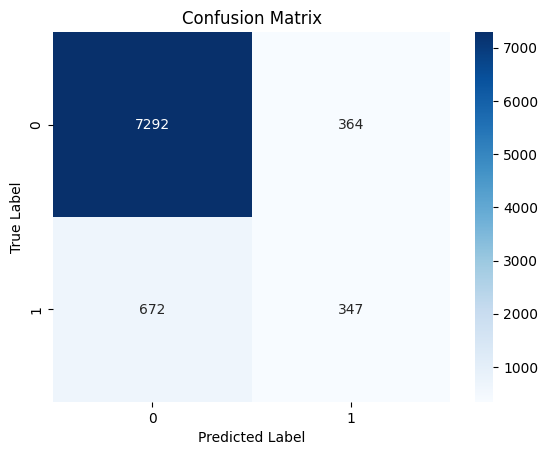

In [ ]:
#Step 4: Evaluate the Best Model
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction on the test set
y_pred = grid_knn.predict(X_test)
y_pred_proba = grid_knn.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
cv_scores = cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Average cross-validation accuracy:", np.mean(cv_scores))


Cross-validation accuracy scores: [0.88530259 0.87595112 0.84447775 0.78326032 0.84424718]
Average cross-validation accuracy: 0.8466477910400354


Accuracy: 0.8806
ROC AUC: 0.8360
Precision: 0.4880
Recall: 0.3405
F1 Score: 0.4012


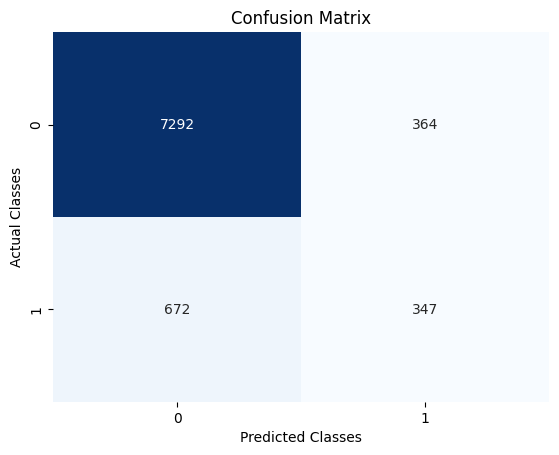

In [ ]:
#step 5: calculate metrices

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction on the test set
y_pred = grid_knn.predict(X_test)
y_pred_proba = grid_knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()



In [ ]:
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.95      0.93      7656
         Yes       0.49      0.34      0.40      1019

    accuracy                           0.88      8675
   macro avg       0.70      0.65      0.67      8675
weighted avg       0.87      0.88      0.87      8675





---



**Decision Tree**


---



In [ ]:
!pip install graphviz


In [ ]:
#___pipeline for tree___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
import pandas as pd

# Define the pipeline
pipe = Pipeline([
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])


In [ ]:
#paramter grid

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': range(1, 30),
    'classifier__max_features': ['sqrt', 'log2']
}

#Step 3: Grid Search with Cross-Validation
# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=123)

# Setup GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=kf, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_tree = grid_search.best_estimator_
print("Best configuration:", grid_search.best_params_)
print("Best ROC AUC from CV:", grid_search.best_score_)


Fitting 10 folds for each of 116 candidates, totalling 1160 fits
Best configuration: {'classifier__criterion': 'entropy', 'classifier__max_depth': 14, 'classifier__max_features': 'sqrt'}
Best ROC AUC from CV: 0.9445140401085153


In [ ]:
#Step 4: Evaluate the Model
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("ROC AUC on Test Set:", roc_auc)


Accuracy on Test Set: 0.8386167146974063
ROC AUC on Test Set: 0.7448014244505903


In [ ]:
#step 5: Visualize the Decision Tree

from sklearn.tree import export_graphviz
import graphviz

# Export as DOT data
dot_data = export_graphviz(best_tree.named_steps['classifier'], out_file=None,
                           feature_names=X_train.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True, special_characters=True)

# Create and display the graph
graph = graphviz.Source(dot_data)
#graph.render("best_decision_tree")  # Optionally save the tree to a file
graph  # Display the tree


In [ ]:
#Step 6: Final Cross-Validation Scores
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

cv_scores = cross_val_score(best_tree, X, y, cv=kf, scoring='accuracy')
cv_scores_roc = cross_val_score(best_tree, X, y, cv=kf, scoring='roc_auc')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))
print("Cross-Validation ROC AUC Scores:", cv_scores_roc)
print("Average Cross-Validation ROC AUC:", np.mean(cv_scores_roc))


Cross-Validation Accuracy Scores: [0.78123559 0.77265391 0.78902467 0.79455845 0.76481439 0.79248328
 0.78349089 0.77242333 0.77519022 0.78810237]
Average Cross-Validation Accuracy: 0.7813977118839649
Cross-Validation ROC AUC Scores: [0.76200438 0.80570094 0.8275608  0.78409069 0.75750136 0.78668663
 0.76853829 0.77750489 0.81369416 0.79975611]
Average Cross-Validation ROC AUC: 0.7883038257367511


In [ ]:
#Step 7: Calculate Metrics

from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# y_pred and y_test are already defined
y_pred = best_tree.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate recall, precision, and F1-score
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the positive class for 'subscribed'
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print all metrics
print("Confusion Matrix:\n", cm)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)
print("F1-Score:", f1)

# Additionally, print the classification report for a comprehensive view
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[6641 1015]
 [ 385  634]]
Recall (Sensitivity): 0.6221786064769381
Precision: 0.38447543966040026
F1-Score: 0.47526236881559225

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.90      7656
           1       0.38      0.62      0.48      1019

    accuracy                           0.84      8675
   macro avg       0.66      0.74      0.69      8675
weighted avg       0.88      0.84      0.85      8675



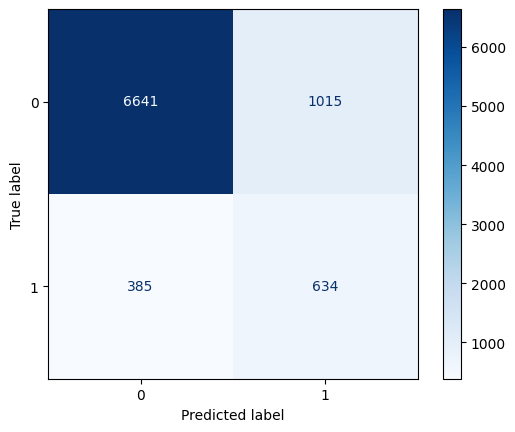

In [ ]:
# Using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix and classification report reveal key insights into the performance of the decision tree model in predicting customer subscriptions to a term deposit. The model demonstrates strong capability in identifying non-subscribers with a high true negative count of 6641, indicating robust accuracy in this regard, underscored by a precision of 95% for class 0 (non-subscribers). This high precision is complemented by an equally impressive recall of 87%, resulting in an F1-score of 0.90, suggesting that the model is highly effective at identifying and confirming non-subscribers accurately.

However, the model's performance in identifying actual subscribers (class 1) is better than KNN. Although the recall for subscribers is moderately at 62%, indicating that the model can identify over half of the actual subscribers, the precision is significantly lower at 38%. This low precision indicates a high rate of false positives—1015 customers were incorrectly predicted to subscribe. Consequently, the F1-score for subscribers stands at 0.48, reflecting the imbalance between recall and precision and pointing to a need for improvement in accurately classifying potential subscribers.

The model's tendency to misclassify actual subscribers as non-subscribers (385 false negatives) further emphasizes its weaknesses in effectively targeting likely subscribers. While the overall accuracy of the model is 84%, the detailed metrics highlight a critical area of concern in reducing false positives and improving the identification of true positives, thereby enhancing the model's utility in practical scenarios where identifying potential subscribers is crucial.

                Feature  Importance
2              duration    0.410586
23           housing_no    0.117526
19  education_secondary    0.053794
3              campaign    0.043899
20   education_tertiary    0.043803
9        job_management    0.039834
24          housing_yes    0.036950
4             month_int    0.036899
1               balance    0.034502
25              loan_no    0.024948
0                   age    0.024689
5            job_admin.    0.020749
15       job_technician    0.020103
26             loan_yes    0.016152
6       job_blue-collar    0.015457
14          job_student    0.012978
18    education_primary    0.010525
13         job_services    0.009514
17      education_other    0.007885
11          job_retired    0.006750
12    job_self-employed    0.003098
16       job_unemployed    0.002970
7      job_entrepreneur    0.002755
22          default_yes    0.001314
8         job_housemaid    0.001028
10            job_other    0.000721
21           default_no    0

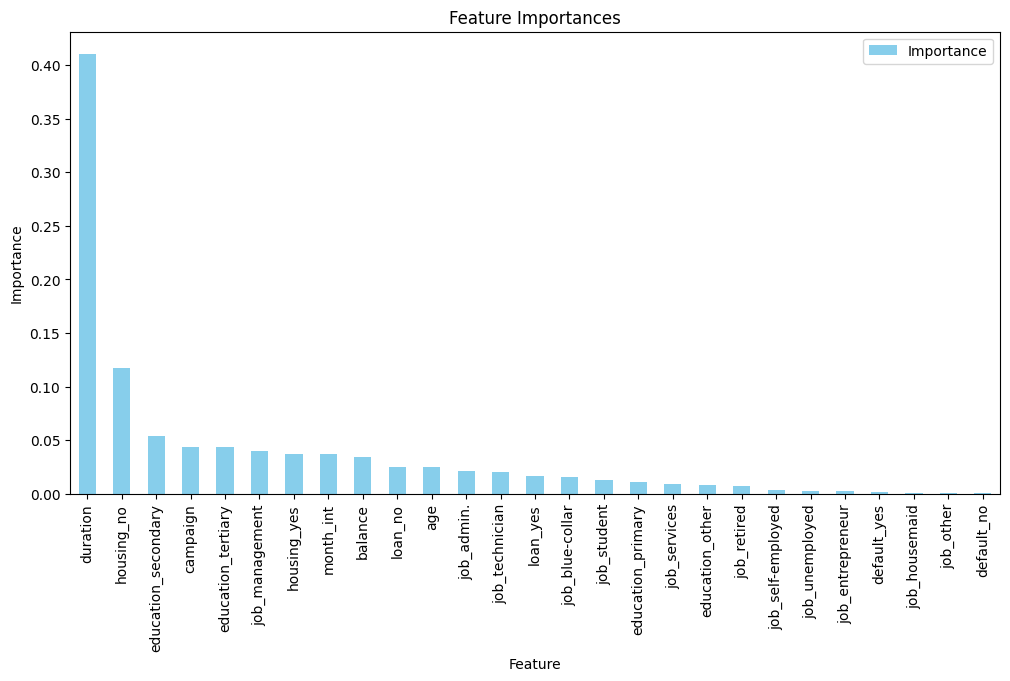

In [ ]:
# #"Feature importances:"

best_pipeline = grid_search.best_estimator_

best_tree = best_pipeline.named_steps['classifier']
importances = best_tree.feature_importances_

import pandas as pd

# Feature names can be accessed from the feature input to the model;
feature_names = X_train_resampled.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

import matplotlib.pyplot as plt

feature_importance_df.set_index('Feature').plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()





---
**Logistic Regression**


---



In [ ]:
#Logistic

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the pipeline with logistic regression only
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logistic', LogisticRegression(max_iter=1000))  # Logistic regression with increased max_iter
])

# Define the parameter grid
param_grid_lr = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'logistic__solver': ['liblinear', 'lbfgs', 'saga']  # Different solvers
}

# Setup GridSearchCV to find the best configuration
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='roc_auc', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best model
print("Best configuration:", grid_search_lr.best_params_)
print("Best roc_auc achieved:", grid_search_lr.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best configuration: {'logistic__C': 0.01, 'logistic__solver': 'liblinear'}
Best roc_auc achieved: 0.8925887276027893


ROC AUC on test data: 0.8998767410834684


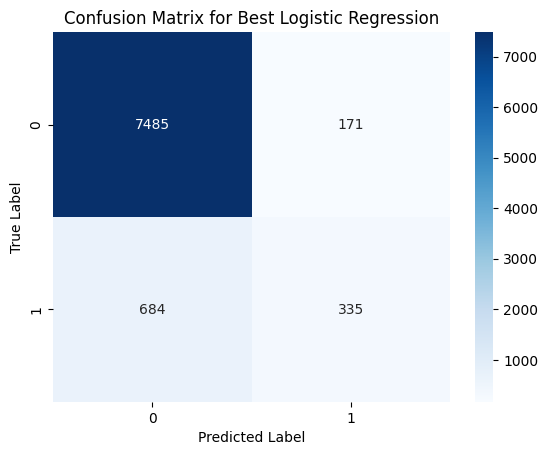

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7656
           1       0.66      0.33      0.44      1019

    accuracy                           0.90      8675
   macro avg       0.79      0.65      0.69      8675
weighted avg       0.89      0.90      0.89      8675



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the best logistic regression model
y_pred_lr = grid_search_lr.predict(X_test)

# Assuming y_test is your actual labels for the test set
y_pred_test = grid_search_lr.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC AUC for test data
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC AUC on test data:", test_roc_auc)


# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Best Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred_lr))


# Removing Variables:




Justification for considering the removal of age, education, and job status as predictor variables in the context of building a classification model for predicting client behavior regarding term deposit subscription is that:
1. Age:
  
      *   Privacy and Identification: Age can be a sensitive variable that, if not handled carefully, may lead to the identification of specific individuals, especially in combination with other demographic information. Protecting client privacy is paramount, and using age in a way that could potentially identify individuals may raise ethical concerns.
      *   Fairness and Discrimination: Age-related discrimination is a serious ethical consideration in data analysis and modeling. Using age as a direct predictor without appropriate safeguards could unintentionally lead to biased outcomes or discriminatory practices, particularly if certain age groups are disproportionately affected by model predictions or marketing strategies.



2. Education:

      *   Bias and Generalization: Education level is often correlated with socioeconomic status and can introduce bias if not carefully handled. Using education as a predictor may inadvertently reinforce existing societal biases or assumptions about individuals based on their educational background.
      *   Ethical Considerations: There are ethical considerations regarding the use of education as a factor in predictive modeling, as it may unfairly disadvantage individuals with lower levels of education or perpetuate stereotypes.

3. Job Status:

      *   Occupational Bias: Job status can introduce occupational biases into the model. Certain occupations may be unfairly associated with specific behaviors or outcomes, leading to biased predictions or reinforcing stereotypes.
      *   Privacy Concerns: Similar to age and education, job status can also contribute to the identification of individuals, especially in smaller or more homogeneous populations. Ensuring privacy and anonymity in data analysis is crucial, and sensitive variables like job status should be handled with care.

Each of 3 models will be built again.

In [ ]:
#removing these variables
Bank_data_2 = pd.read_csv("https://raw.githubusercontent.com/yfsui/Bank-Telemarketing-ML-Project/master/bank_raw.csv", sep = ';')
condition = Bank_data_2.poutcome == 'other'
Bank_data_2 = Bank_data_2.drop(Bank_data_2[condition].index, axis = 0, inplace = False)

# Step 2: Fill 'unknown' in job and education to 'other'
Bank_data_2[['job','education']] = Bank_data_2[['job','education']].replace(['unknown'],'other')

Bank_data_2 = Bank_data_2.drop('contact', axis=1)
Bank_data_2 = Bank_data_2.drop('day', axis=1)
Bank_data_2 = Bank_data_2.drop('pdays', axis=1)
Bank_data_2.drop(['marital'],axis=1, inplace=True)
Bank_data_2 = Bank_data_2.drop('previous', axis =1)
Bank_data_2 = Bank_data_2.drop('poutcome', axis =1)

#Step 6: Changing duartion from secinds to minutes /Change the unit of 'duration' from seconds to minutes
Bank_data_2['duration'] = Bank_data_2['duration'].apply(lambda n:n/60).round(2)

lst = [Bank_data_2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12


# Remove 'age', 'job', and 'education' columns from Bank_data
Bank_data_2.drop(['age', 'job', 'education'], axis=1, inplace=True)
# Assuming Bank_data contains a 'month' column with month names
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
Bank_data_2['month_int'] = Bank_data_2['month'].apply(lambda x: months.index(x) + 1)
# Drop the original 'month' column
Bank_data_2.drop('month', axis=1, inplace=True)
# Assuming 'Response' is your target variable with values 'yes' or 'no'
Bank_data_2['Response_binary'] = Bank_data_2['y'].apply(lambda x: 1 if x == 'yes' else 0)
Bank_data_2.drop('y', axis=1, inplace=True)
# # Removing any erroneously included 'Responses_binary' column
Bank_data_2.drop('Responses_binary', axis=1, inplace=True, errors='ignore')  # errors='ignore' prevents error if the column does not exist
Bank_data_2.head()



default  balance housing loan  duration  campaign  month_int  \
0      no     2143     yes   no      4.35         1          5   
1      no       29     yes   no      2.52         1          5   
2      no        2     yes  yes      1.27         1          5   
3      no     1506     yes   no      1.53         1          5   
4      no        1      no   no      3.30         1          5   

   Response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

In [ ]:

# # Create dummy variables for remaining categorical features
Bank_data_encoded = pd.get_dummies(Bank_data_2.drop('Response_binary', axis=1))
X = Bank_data_encoded
y = Bank_data_2['Response_binary']
# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
# # Initialize and apply SMOTE
smote = SMOTE(random_state=420)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Bank_data_2.head()
# # # Check the new class distribution
# print(pd.Series(y_train_resampled).value_counts())
# # Display the first few rows to check everything is as expected
X.head()

balance  duration  campaign  month_int  default_no  default_yes  \
0     2143      4.35         1          5        True        False   
1       29      2.52         1          5        True        False   
2        2      1.27         1          5        True        False   
3     1506      1.53         1          5        True        False   
4        1      3.30         1          5        True        False   

   housing_no  housing_yes  loan_no  loan_yes  
0       False         True     True     False  
1       False         True     True     False  
2       False         True    False      True  
3       False         True     True     False  
4        True        False     True     False

In [ ]:
#use PCA for features extraction and new models for removed variables.

In [ ]:
#KNN without age etc

In [ ]:
#Step1:  Define the Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline that includes scaling and the KNN classifier
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define the Parameter Grid including PCA components
#Step 2: Define the Parameter Grid

param_grid_knn = {
    'knn__n_neighbors': range(1, 30),
    'knn__metric': ['euclidean', 'manhattan']
}


# Setup GridSearchCV to find the best configuration
grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='roc_auc', verbose=1)
grid_search_knn.fit(X_train, y_train)

# Output the best parameters and best score achieved
print("Best parameters:", grid_search_knn.best_params_)
print("Best roc_auc achieved:", grid_search_knn.best_score_)


Fitting 5 folds for each of 58 candidates, totalling 290 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 29}
Best roc_auc achieved: 0.8726820242558743


Accuracy: 0.8970605187319884
ROC AUC: 0.8752603397995993


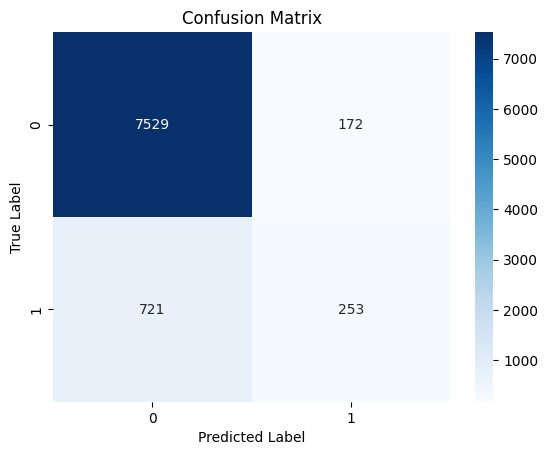

In [ ]:
#Step 4: Evaluate the Best Model
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction on the test set
y_pred = grid_search_knn.predict(X_test)
y_pred_proba = grid_search_knn.predict_proba(X_test)[:, 1]

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
#Decision Tree without age etc

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# Define the pipeline with PCA
pipe = Pipeline([
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

# Define the parameter grid including PCA components
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': range(1, 30),
    'classifier__max_features': ['sqrt', 'log2']
}

# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=123)

# Setup GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=kf, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_tree = grid_search.best_estimator_
print("Best configuration:", grid_search.best_params_)
print("Best ROC AUC from CV:", grid_search.best_score_)


Fitting 10 folds for each of 116 candidates, totalling 1160 fits
Best configuration: {'classifier__criterion': 'entropy', 'classifier__max_depth': 13, 'classifier__max_features': 'log2'}
Best ROC AUC from CV: 0.9359167153461888


In [ ]:
#Step 4: Evaluate the Model
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("ROC AUC on Test Set:", roc_auc)


Accuracy on Test Set: 0.8123342939481268
ROC AUC on Test Set: 0.7521501781016198


In [ ]:
# #step 5: Visualize the Decision Tree

# from sklearn.tree import export_graphviz
# import graphviz

# # Export as DOT data
# dot_data = export_graphviz(best_tree.named_steps['classifier'], out_file=None,
#                            feature_names=X_train.columns,
#                            class_names=['No', 'Yes'],
#                            filled=True, rounded=True, special_characters=True)

# # Create and display the graph
# graph = graphviz.Source(dot_data)
# #graph.render("best_decision_tree")  # Optionally save the tree to a file
# graph  # Display the tree


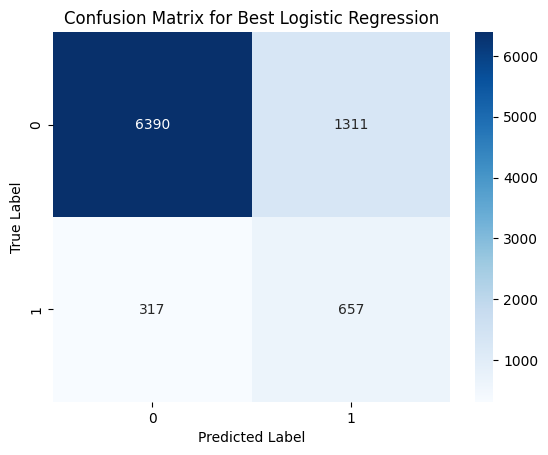


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      7701
           1       0.33      0.67      0.45       974

    accuracy                           0.81      8675
   macro avg       0.64      0.75      0.67      8675
weighted avg       0.88      0.81      0.84      8675



In [ ]:
#Step 7: Calculate Metrics

from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# y_pred and y_test are already defined
y_pred = best_tree.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate recall, precision, and F1-score
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the positive class for 'subscribed'
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print all metrics
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Best Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Additionally, print the classification report for a comprehensive view
print("\nClassification Report:\n", classification_report(y_test, y_pred))


       Feature  Importance
1     duration    0.420470
6   housing_no    0.149230
7  housing_yes    0.092043
2     campaign    0.079519
3    month_int    0.076535
8      loan_no    0.068684
0      balance    0.065522
9     loan_yes    0.041877
5  default_yes    0.003301
4   default_no    0.002818


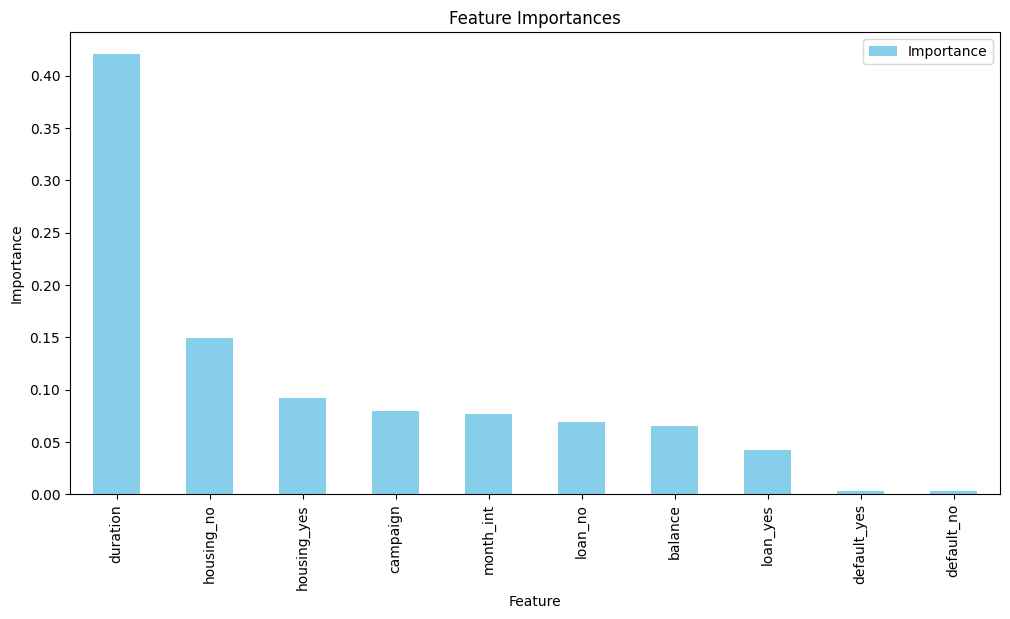

In [ ]:
best_pipeline = grid_search.best_estimator_

best_tree = best_pipeline.named_steps['classifier']
importances = best_tree.feature_importances_

import pandas as pd

# Feature names can be accessed from the feature input to the model;
feature_names = X_train_resampled.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

import matplotlib.pyplot as plt

feature_importance_df.set_index('Feature').plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()



In [ ]:
#logistic without age etc

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the pipeline with PCA and logistic regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
      # PCA for dimensionality reduction
    ('logistic', LogisticRegression(max_iter=1000))  # Logistic regression with increased max_iter
])

# Define the parameter grid
param_grid_lr = {
      # Exploring different levels of variance to keep
    'logistic__C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'logistic__solver': ['liblinear', 'lbfgs']  # Different solvers
}

# Setup GridSearchCV to find the best configuration
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best model
print("Best configuration:", grid_search_lr.best_params_)
print("Best accuracy achieved:", grid_search_lr.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best configuration: {'logistic__C': 0.1, 'logistic__solver': 'liblinear'}
Best accuracy achieved: 0.8902466782372367


ROC AUC on test data: 0.8432903724335651


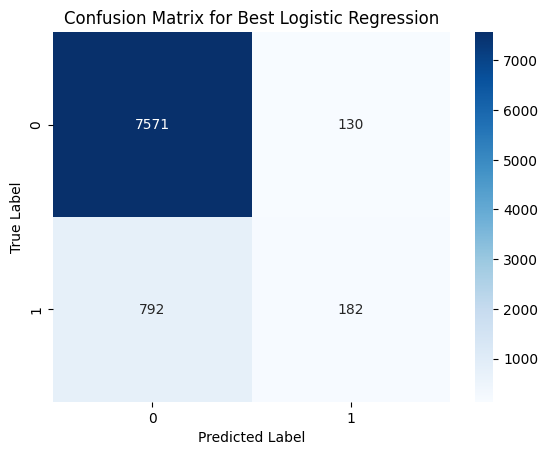

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7701
           1       0.58      0.19      0.28       974

    accuracy                           0.89      8675
   macro avg       0.74      0.58      0.61      8675
weighted avg       0.87      0.89      0.87      8675



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the best logistic regression model
y_pred_lr = grid_search_lr.predict(X_test)

# Assuming y_test is your actual labels for the test set
y_pred_test = grid_search_lr.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC AUC for test data
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC AUC on test data:", test_roc_auc)


# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Best Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred_lr))


In [ ]:
# # from sklearn.svm import SVC

# # # SVM with Linear Kernel
# # svm_linear = SVC(kernel='linear', C=1.0)
# # svm_linear.fit(X_train, y_train)
# # y_pred_linear = svm_linear.predict(X_test)
# # print('Accuracy (SVM Linear):', accuracy_score(y_test, y_pred_linear))

# # # SVM with Polynomial Kernel
# # svm_poly = SVC(kernel='poly', C=1.0)
# # svm_poly.fit(X_train, y_train)
# # y_pred_poly = svm_poly.predict(X_test)
# # print('Accuracy (SVM Polynomial):', accuracy_score(y_test, y_pred_poly))

# #Step 1: Set Up the Pipeline

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# # Setup a pipeline with an SVM classifier
# svm_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # SVM benefits from feature scaling
#     ('svm', SVC())
# ])


# #Step 2: Define the Parameter Grid

# param_grid_svm = {
#     'svm__kernel': ['linear', 'rbf'],  # Two different kernel types
#     'svm__C': [0.1, 1, 10]            # Few values of the regularization parameter
# }


# #Step 3: Grid Search with Cross-Validation
# from sklearn.model_selection import GridSearchCV

# # Use GridSearchCV to find the best SVM configurations
# svm_grid = GridSearchCV(svm_pipeline, param_grid_svm, cv=10, scoring='roc_auc', verbose=1)
# svm_grid.fit(X_train_resampled, y_train_resampled)

# # Output the best parameters and best score achieved
# print("Best parameters:", svm_grid.best_params_)
# print("Best accuracy achieved:", svm_grid.best_score_)


# #Step 4: Evaluate the Best Model

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Predictions using the best SVM model
# y_pred_svm = svm_grid.predict(X_test)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f'Accuracy (Best SVM): {accuracy:.4f}')

# # Display confusion matrix
# cm = confusion_matrix(y_test, y_pred_svm)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.title('Confusion Matrix for Best SVM')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # Detailed classification report
# print("Detailed Classification Report:")
# print(classification_report(y_test, y_pred_svm))

